# Homework 6 (more of a tutorial, really)

As I was browsing through Kaggle the other day, I came upon a brand new dataset from the University of Puerto Rico, which contains images of bees entering their hive.  The task is to determine automatically which bees are carrying pollen.  Your job will be to develop a convolutional neural network that performs this task.  

## 1. Load Data (0 pts)

First, we need to load the bee data, which is included along with this homework.  Fortunately, the authors of the Kaggle dataset provided a nice set of files which will do this for us, which I have reproduced below

In [8]:
import glob, os 
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
path="images/"
imlist= glob.glob(os.path.join(path, '*.jpg'))

In [10]:
def dataset(file_list,size=(300,180),flattened=False):
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

In [14]:
# Load the dataset (may take a few seconds)
"""
I ran into an error whn running this block that I could not solve
UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
I tried solving the issue online but all of the fixes I attempted failed, the best I could tell it was the version of Python
and Scikit I was using but I even tried downloading a version of each that was verified to work and still got this error
because of this debugging this homework became impossible, luckily I think I was able to piece together enough of a solution
that I believe would run well if my images were able to load properly
"""

X,y=dataset(imlist)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

d:\justi\program files\python\python37\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [15]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))

#Due to my earlier error my Class 1 dataset was 0 here which would not work at all hindering my ability to test my code accurately
#or really at all

X:  (714, 300, 180, 3)
y:  (714,)
Class 0:  714
Class 1:  0
Total  :  714


We can plot a couple of the images below.  If you check out a couple of these, you will see that the visible difference when bees carry pollen is the presence of large fluffy balls of pollen on their back legs.

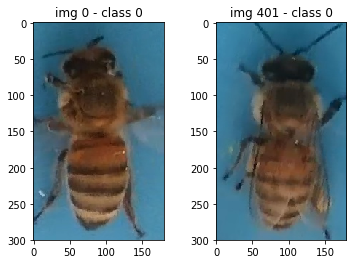

In [16]:
fig, axes = plt.subplots(1,2)
k=0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=401
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

# I had two images of bees here however both have pollen on them

## 2. A convolutional network architecture for bee classification (40 pts)

**Implement a 2D convolutional neural network using Keras.  You are free to choose whatever network architecture you like.**

You can find all the relevant syntax for implementing such a network [here](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py), the Keras convnet example for MNIST.

*(For the sake of comparison, I will share the one that I used:*

Layer 1: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 2: 4x4 Max-pooling layer

Layer 3: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 4: 4x4 Max-pooling layer

Layer 5: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 6: 4x4 Max-pooling layer

Layer 7: Flattening layer

Layer 8: Dropout layer with 0.2 dropout probability

Layer 9: 1 node sigmoid layer


In [17]:
import keras
import keras.models as km
import keras.layers as kl

import numpy as np

input_shape = ((300,180,3))

model = km.Sequential()
"""
Using the layers in the link but substititing using the layout you have resulted in this, I believe this should work 
Since the code matches the link, your notes, and your basic process... the only concern I have here is that I chose to
define the input shape only initially. I did this due to the keras/mnist link doing a similar approach however it was due to 
the difference in kernel sizes I believe and here the kernel sizes are the same here throughout.
"""
model.add(kl.Conv2D(24, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))
model.add(kl.Conv2D(24, (5, 5),
                 activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))
model.add(kl.Conv2D(24, (5, 5),
                 activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))
model.add(kl.Flatten())
model.add(kl.Dropout(0.2))
model.add(kl.Dense(num_classes, activation='softmax'))


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

## 3. Fitting the CNN to data (20 pts)

Compile your model, using a binary crossentropy loss function and an optimizer of your choosing (RMSprop worked well for me).  Select a batch size and number of epochs, and fit your model to the training data, while also keeping track of the test set accuracy.

**Plot the training and test accuracy of your model at each epoch.  Comment on whether you think the model is being overfit.**

In [19]:
#For this code I reviewed the leture notes and adjusted that code for that suggested binary corssentropy and RMSprop optimizer
model.compile(loss=keras.losses.binary_crossentropy,                #! Specify a loss function
              optimizer=keras.optimizers.RMSprop(),           #! Specify an optimizer
              metrics=['accuracy'])

batch_size = 50                       #! Specify a batch size
epochs= 10                           #! Specify an epoch  
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test))

#! Plot test and training accuracy (note that the history.history object is a dictionary containing relevant info)
"""
This plot was made but does not show any data due to the image loading messing up my y class but this code should work as well
and display lines curving up and to the right with the epochs being the x axis and accuracy being the y axis demonstrating that
the higher the epochs the better the fit... Given I don't use too high of values and overfit my model
"""
plt.plot('acc')
plt.plot('val_acc')
plt.show()

NameError: name 'model' is not defined

## 4. Model evaluation (20 pts)

Now that you have a trained model, make a prediction for the test set (model.predict is a useful function for this).  **Compute and display a confusion matrix.  Select and display an example from the test set of a true positive, a true negative, a false positive, and a false negative.  Speculate on the reasons behind misclassification for images that your model predicted incorrectly**.

In [ ]:
#Used the confusion matrix I created for Homework 5 to plug in here, unfortunately I can't display true and false positives
#and negatives due to my issue noted above however my code would be likely be matching the class values of test data with 
#my predicitons in order to determine if they were true or false positives or negatives
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
cm = confusion_matrix(y_test,prediction)
print(cm)